<a href="https://colab.research.google.com/github/Sarthak2597/Attrition_data/blob/main/Credit_Card_Project_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn==0.24.1

     |████████████████████████████████| 22.3MB 38.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
print(sklearn. __version__)
import seaborn as sns
import pickle
from sklearn import preprocessing
from IPython.display import clear_output
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
%matplotlib inline

0.24.1


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Data Cleaning

We begin from the data augmentation already done in Credit Card Project_SVM.ipynb and carry on from there. Since all the models i.e. SVM, KNN and ANN will be deployed on the same app, it makes sense to have same type of inputs.

In [78]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [79]:
df=df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1)

In [80]:
def norm(y):
  y1=[]
  y1 = y.split()
  for x in y1:
    df[x] = (df[x] - df[x].min())/(df[x].max()-df[x].min())
  return df

In [81]:
norm("Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1")

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,0.077536,0.735399,0.062266,0.206947,0.832647,0.829457,0.230749,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,0.085819,0.868494,0.060499,0.236679,0.459219,0.457364,0.183899,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,0.120042,0.000000,0.156637,0.241095,0.544175,0.387597,0.220248,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,0.116172,0.000000,0.152928,0.157492,0.438689,0.403101,0.194400,0.000


In [82]:
def mapp(x):
    lis=[]
    for i in range(len(x.unique())):
        lis.append(i)
    for j in range(len(lis)):
        print(x.unique()[j],":",lis[j])

In [83]:
mapp(df['Attrition_Flag'])
num_val1, meta_data = pd.factorize(df['Attrition_Flag'])
print()
df['Attrition_Flag'] = num_val1

Existing Customer : 0
Attrited Customer : 1



In [84]:
mapp(df['Card_Category'])
num_val2, meta_data = pd.factorize(df['Card_Category'])
df['Card_Category'] = num_val2

Blue : 0
Gold : 1
Silver : 2
Platinum : 3


In [85]:

mapp(df['Education_Level'])
num_val3, meta_data = pd.factorize(df['Education_Level'])
df['Education_Level'] = num_val3

High School : 0
Graduate : 1
Uneducated : 2
Unknown : 3
College : 4
Post-Graduate : 5
Doctorate : 6


In [86]:
mapp(df['Income_Category'])
num_val4, meta_data = pd.factorize(df['Income_Category'])
df['Income_Category'] = num_val4

$60K - $80K : 0
Less than $40K : 1
$80K - $120K : 2
$40K - $60K : 3
$120K + : 4
Unknown : 5


In [87]:
mapp(df['Gender'])
num_val3, meta_data = pd.factorize(df['Gender'])
df['Gender'] = num_val3

M : 0
F : 1


In [88]:
mapp(df['Marital_Status'])
num_val3, meta_data = pd.factorize(df['Marital_Status'])
df['Marital_Status'] = num_val3

Married : 0
Single : 1
Unknown : 2
Divorced : 3


In [89]:
df.insert(20, 'Target', df['Attrition_Flag'])
df=df.drop(['Attrition_Flag'], axis=1)

In [90]:
df = df.sample(frac=1).reset_index(drop=True)

In [91]:
df = df.drop(['Marital_Status','Gender','Income_Category','Education_Level','Card_Category','Avg_Open_To_Buy','Credit_Limit','Months_on_book','Dependent_count','Customer_Age'], axis=1)

# Machine Learning

In [92]:
working_data = df.iloc[0:10000,:]
testing_data = df.iloc[10000:,:]

In [93]:
xx=testing_data.iloc[:,:9]
yy=testing_data.iloc[:,9:]

In [94]:
x = working_data.iloc[:,:9]
labels = working_data.iloc[:,9:]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=0)

In [96]:
training_accuracy  = []  
test_accuracy = []
x_axis=[]
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    x_axis.append(i)
    
from IPython.display import clear_output
clear_output()

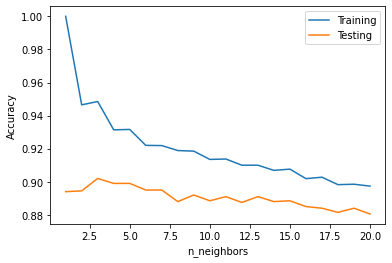

In [97]:
plt.plot(x_axis, training_accuracy, label="Training")
plt.plot(x_axis, test_accuracy, label="Testing")
plt.legend(["Training", "Testing"], loc ="upper right")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()

In [98]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [99]:
y_pred=knn.predict(X_test)

In [100]:
cm = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Actual_Not_Targeted', 'Actual_Targeted'],
                         columns=['predicted_Not_Targeted','predicted_Targeted'])
confusion

,predicted_Not_Targeted,predicted_Targeted
Actual_Not_Targeted,1612,63
Actual_Targeted,133,192


Trying our model on unseen data

In [101]:
new_output = knn.predict(xx)

In [102]:
lis=[]
for i in yy['Target']:
  lis.append(i)

In [103]:
print('Actual ====> Predicted')
for i in range(len(yy['Target'])):
  print(lis[i],'===>',new_output[i])  

Actual ====> Predicted
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
1 ===> 0
0 ===> 0
0 ===> 0
1 ===> 1
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
1 ===> 1
0 ===> 0
1 ===> 1
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
1 ===> 1
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
1 ===> 1
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
1 ===> 0
1 ===> 1
0 ===> 0
1 ===> 1
0 ===> 0
1 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
1 ===> 1
1 ===> 1
0 ===> 0
0 ===> 0
1 ===> 1
0 ===> 0
0 ===> 0
1 ===> 0
0 ===> 0
1 ===> 1
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
1 ===> 1
0 ===> 0
0 ===> 0
0 ===> 0
1 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
1 ===> 1
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
0 ===> 0
1 ===> 1
0 ===> 0
0 ===> 0
0 ===

In [104]:
c=0
for j in range(len(new_output)):
  if lis[j]==new_output[j]:
    c=c+1
print("The number of occasions on which our model showed correct classification:",c,"out-off",j+1,"cases")

The number of occasions on which our model showed correct classification: 122 out-off 127 cases


In [105]:
cm = np.array(confusion_matrix(lis, new_output, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Actual_Not_Targeted', 'Actual_Targeted'],
                         columns=['predicted_Not_Targeted','predicted_Targeted'])
confusion

,predicted_Not_Targeted,predicted_Targeted
Actual_Not_Targeted,105,0
Actual_Targeted,5,17


In [106]:
Pkl_Filename = "KNN_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn, file)

In [107]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id':'your folder id'}]})
file.SetContentFile("KNN_Model.pkl")
file.Upload() 